<font color='cornflowerblue' size=5><b>Open Source Tools - Google Store Application Ratings</b></font><br><br>
<font size=3>Assaf Berman (ID 305689259), Ben Pinhasov (ID 312202633)<br>
12/09/2022</font>

<font color='cornflowerblue' size=4><b>1. Research question</b></font><br>
Prediction of application rating based on application features, amount of downloads and review scores.<br>
The dataset contains two CSV files: googleplaystore.csv (containing app and download data), and googleplaystore_user_reviews.csv (containing user review and sentiment analysis data).<br>
The motive is to allow insight for app developers in order to develop more noticeable apps.

<font color='cornflowerblue' size=4><b>2. Performance evaluation</b></font><br>
Data is split between train set (80%) and test set (20%).<br>
Performance of Linear Regression model is evaluated using test MSE.<br>
Performance of Regression Random Forest model is evaluated using test MSE for the prediction.

<font color='cornflowerblue' size=4><b>3. Data exploration</b></font><br>
There are two datasets loaded into dataframes, corresponding to the two CSV files:<br>
<ul><li><i><b>df_apps</b></i> loaded from googleplaystore.csv</li>
    <li><i><b>df_reviews</b></i> loaded from googleplaystore_user_reviews.csv</li></ul>
Each of the two datasets are split into train sets (<i><b>df_apps_train</b></i> and <i><b>df_reviews_train</b></i> respectively), and test sets (<i><b>df_apps_test</b></i> and <i><b>df_reviews_test</b></i> respectively) at a ratio of 80:20.<br>
The train and test set's labels are distributed equaly, as can be seen in 3.6.<br>
There are 1,481 rows in <i><b>df_apps</b></i> dataframe with missing data, and 26,868 rows in <i><b>df_reviews</b></i> dataframe.

<font color='cornflowerblue' size=3>3.1. Package import</font><br>

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import to_rgba
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
sns.set_theme()
sns.set_palette('bright')
warnings.filterwarnings(action='ignore')

<font color='cornflowerblue' size=3>3.2. Data read into dataframes</font><br>

In [2]:
df_apps = pd.read_csv('googleplaystore.csv')
df_reviews = pd.read_csv('googleplaystore_user_reviews.csv')

<font color='cornflowerblue' size=3>3.3. Data split to train and test sets</font><br>

In [3]:
df_apps_train, df_apps_test = train_test_split(df_apps, train_size=0.8, random_state=42)
df_reviews_train, df_reviews_test = train_test_split(df_reviews, train_size=0.8, random_state=42)

<font color='cornflowerblue' size=3>3.4. Record number in each set</font><br>

In [4]:
print(f'apps dataframe has {len(df_apps_train):,.0f} records in the train set and {len(df_apps_test):,.0f} records in the test set.')
print(f'user reviews dataframe has {len(df_reviews_train):,.0f} records in the train set and {len(df_reviews_test):,.0f} records in the test set.')

apps dataframe has 8,672 records in the train set and 2,169 records in the test set.
user reviews dataframe has 51,436 records in the train set and 12,859 records in the test set.


<font color='cornflowerblue' size=3>3.5. Column description</font><br>

In [5]:
print(len(df_apps.columns.values),'columns in apps dataframe. columns:',df_apps.columns.values)
print(len(df_reviews.columns.values),'coulmns in user reviews dataframe. columns:',df_reviews.columns.values)

13 columns in apps dataframe. columns: ['App' 'Category' 'Rating' 'Reviews' 'Size' 'Installs' 'Type' 'Price'
 'Content Rating' 'Genres' 'Last Updated' 'Current Ver' 'Android Ver']
5 coulmns in user reviews dataframe. columns: ['App' 'Translated_Review' 'Sentiment' 'Sentiment_Polarity'
 'Sentiment_Subjectivity']


<font color='cornflowerblue' size=3>3.6. Label distribution</font><br>

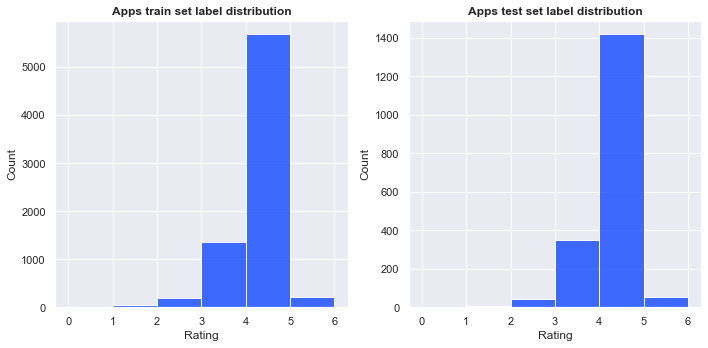

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.histplot(data=df_apps_train, x='Rating', bins=range(0,7), ax=ax[0]).set_title('Apps train set label distribution', fontdict={'fontweight':'bold'})
sns.histplot(data=df_apps_test, x='Rating', bins=range(0,7), ax=ax[1]).set_title('Apps test set label distribution', fontdict={'fontweight':'bold'})
plt.tight_layout()
plt.show()

<font color='cornflowerblue' size=3>3.7. Missing values</font><br>

In [7]:
df_apps[df_apps.isnull().any(axis=1)].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up


In [8]:
df_reviews[df_reviews.isnull().any(axis=1)].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN


<font color='cornflowerblue' size=3>3.8. Plots</font><br>
Data plots are displayed in section 5 after data cleaning and manipulation.

Rating vs Price
Users rate paid apps higher (free apps are uniformly distributed)

Rating vs Reviews
Users how write reviews on an app tend to rate the app high (regardless of the sentiment of the review)

<font color='cornflowerblue' size=4><b>4. Data cleaning and manipulation</b></font><br>
<i><b>Size</b></i>, <i><b>Price</b></i> and <i><b>Installs</b></i> columns have been parsed to numeric values (indicated by the names <i><b>Size_number</b></i>, <i><b>Price_number</b></i> and <i><b>Installs_number</b></i>).<br>
<i><b>Type</b></i> and <i><b>Sentiment</b></i> columns have been label encoded.

<font color='cornflowerblue' size=3>4.1. df_apps</font><br>
Data exploration revealed wrong types of data in one data point (record). Record 10472 is the faulty record (almost all values were shifted left).<br>The faulty values were shifted right as a correction step with <i><b>Category</b></i> value remained NaN.<br>
Record 9148 appeared to have missing data from <i><b>Rating</b></i> and <i><b>Type</b></i>, with zeros in <i><b>Reviews</b></i> and <i><b>Installs</b></i>. Therefore it was deprecated.

In [9]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
df_apps[df_apps['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
for i in range(len(df_apps.columns)-1,1,-1):
    df_apps.at[10472,df_apps.columns[i]] = df_apps.at[10472,df_apps.columns[i-1]]
df_apps.at[10472,'Category']=np.nan

In [12]:
df_apps.iloc[[10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [13]:
df_apps.iloc[9148]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  NaN
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                    NaN
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Last Updated                  June 28, 2018
Current Ver              Varies with device
Android Ver              Varies with device
Name: 9148, dtype: object

In [14]:
df_apps.drop(9148, inplace=True)

<font color='cornflowerblue' size=3>4.2. Convert numeric columns to numbers</font><br>
<i><b>Installs_number</b></i> was created from <i><b>Installs</b></i> by removing '+' and ',' characters.<br>
<i><b>Size_number</b></i> was created from <i><b>Size</b></i> by removing k (and multiplying by 1E3), or removing M (and multiplying by 1E6) to convert all to bytes.<br>
<i><b>Price_number</b></i> was created from <i><b>Price</b></i> by removing '$'.<br>
Then the numeric columns were converted to type float64.<br>
Lastly, <i><b>Type</b></i> column containing two distinct values was label encoded.

In [15]:
df_apps['Installs_number'] = [x.replace('+','').replace(',','') for x in df_apps['Installs']]
df_apps['Size_number'] = df_apps['Size']
df_apps['Size_number'] = [(float(x.replace('k',''))*1E3) if ('k' in str(x)) else x for x in df_apps['Size_number']]
df_apps['Size_number'] = [(float(x.replace('M',''))*1E6) if ('M' in str(x)) else x for x in df_apps['Size_number']]
df_apps['Size_number'] = [-1 if ('Varies' in str(x)) else x for x in df_apps['Size_number']]
df_apps['Price_number'] = [x.replace('$','') for x in df_apps['Price']]

In [16]:
def to_float64(col_list):
    for col in col_list:
        df_apps[col] = df_apps[col].astype('float64')

to_float64(['Rating','Reviews','Installs_number','Size_number','Price_number'])

In [17]:
df_apps['Type_Ordinal'] = df_apps['Type'].astype('category').cat.codes

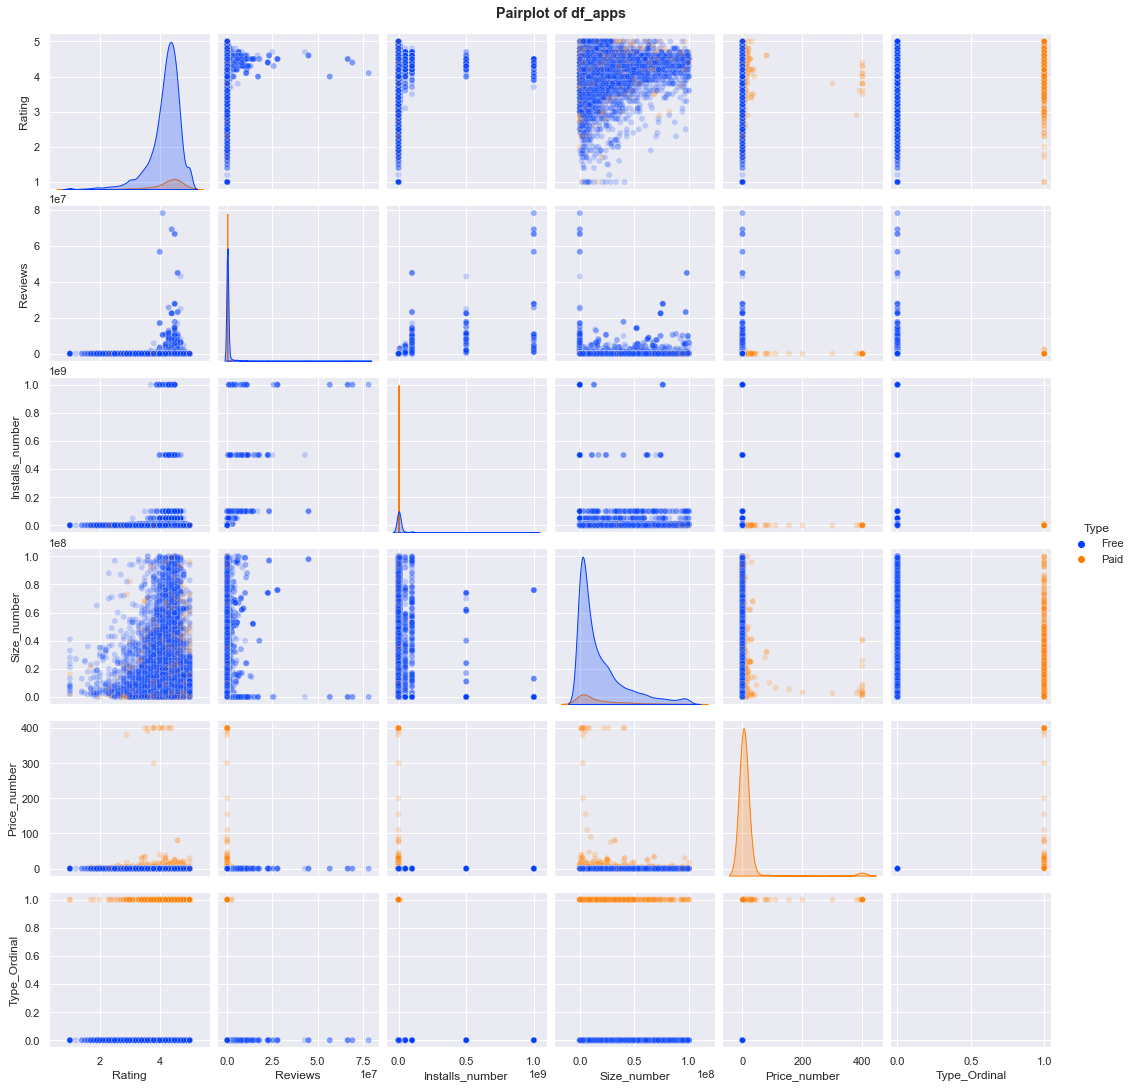

In [18]:
sns.pairplot(df_apps, kind='scatter', hue='Type', plot_kws={'alpha':0.2}).fig.suptitle('Pairplot of df_apps', y=1.01, fontweight='bold')
plt.show()

<font color='cornflowerblue' size=3>4.3. df_reviews</font>

In [19]:
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


<font color='cornflowerblue' size=3>4.4. Cleaning missing data</font>

In [20]:
df_reviews = df_reviews.dropna()
df_reviews.reset_index(inplace=True, drop=True)

<font color='cornflowerblue' size=3>4.5. Converting Sentiment to ordinal</font><br>
<i><b>Sentiment_Ordinal</b></i> was created from <i><b>Sentiment</b></i> where values 'Negative','Neutral' and 'Positive' were mapped to 0,1 and 2 respectively.

In [21]:
df_reviews['Sentiment_ordinal'] = df_reviews['Sentiment'].astype('category').cat.codes

In [22]:
df_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Sentiment_ordinal
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,2
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,2
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,2
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,2
4,10 Best Foods for You,Best way,Positive,1.00,0.300000,2


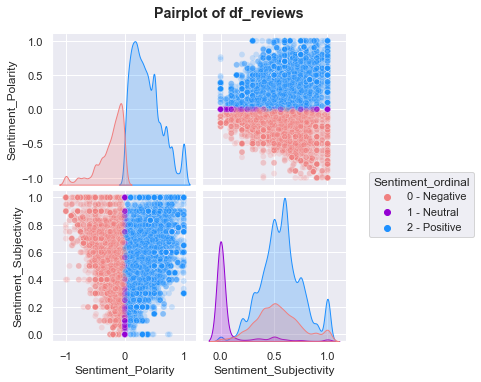

In [23]:
g = sns.pairplot(df_reviews, kind='scatter', hue='Sentiment_ordinal', plot_kws={'alpha':0.2}, palette=['lightcoral','darkviolet','dodgerblue'])
g._legend.remove()
g.fig.suptitle('Pairplot of df_reviews', y=1.05, fontweight='bold')
handles = g._legend_data.values()
g.fig.legend(bbox_to_anchor=(0.8,0.5), borderaxespad=0, handles=handles, labels=['0 - Negative','1 - Neutral', '2 - Positive'], loc='center left', title='Sentiment_ordinal')
plt.show()

<font color='cornflowerblue' size=4><b>5. Data plots</b></font>

<font color='cornflowerblue' size=3>5.1. Installs vs. Price</font><br>
The plots imply that the number of installations of paid apps is much lower than that of free apps.

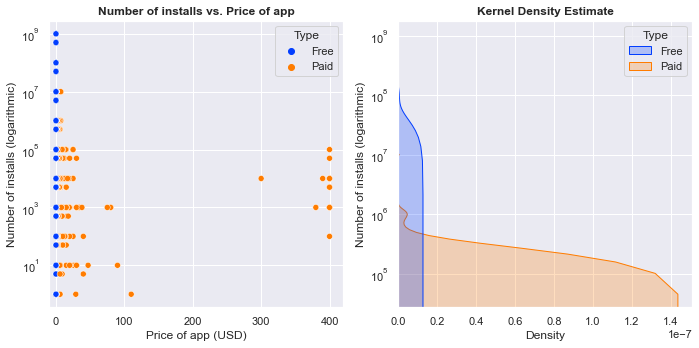

In [24]:
fig, ax = plt.subplots(ncols=2,figsize=(10,5))
sns.scatterplot(data=df_apps, x='Price_number', y='Installs_number', hue='Type', ax=ax[0]).set_title('Number of installs vs. Price of app', fontweight='bold')
ax[0].set_xlim(-10,ax[0].get_xlim()[1])
ax[0].set_xlabel('Price of app (USD)')
ax[0].set_ylabel('Number of installs (logarithmic)')
ax[0].set_yscale('log')
#ax.legend(bbox_to_anchor=(1.02,0.5), loc='center left', borderaxespad=0, title='Type')
#ax_inset = inset_axes(ax, '40%', '40%', loc='upper center', borderpad=3)
sns.kdeplot(data=df_apps, vertical=True, x='Installs_number', hue='Type', bw=0.3, ax=ax[1], shade=True).set_title('Kernel Density Estimate', fontweight='bold')
#ax[1].set_ylim(1,ax[1].get_xlim()[1])
ax[1].set_yscale('log')
ax[1].set_ylabel('Number of installs (logarithmic)')
#ax[1].set_facecolor('white')
plt.tight_layout()
plt.show()

<font color='cornflowerblue' size=3>5.2. Rating vs. Price</font><br>
Using scatter plot, it seems that the rating of free apps is uniformly distributed across all ratings, and the paid apps are usually rated higher (3.0-5.0).<br>
When plotting KDE of the number of installations, it is shown that the ratings are distributed similarly between the free and paid apps (with much larger amount of installs of free apps).

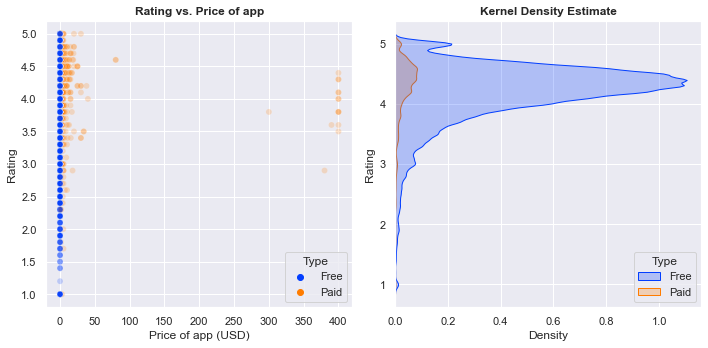

In [25]:
fig, ax = plt.subplots(ncols=2,figsize=(10,5))
sns.scatterplot(data=df_apps, x='Price_number', y='Rating', hue='Type', alpha=0.2, ax=ax[0]).set_title('Rating vs. Price of app', fontweight='bold')
ax[0].set_xlabel('Price of app (USD)')
ax[0].set_ylabel('Rating')
sns.kdeplot(data=df_apps, vertical=True, x='Rating', hue='Type', bw=0.1, ax=ax[1], shade=True).set_title('Kernel Density Estimate', fontweight='bold')
ax[1].set_ylabel('Rating')
sns.move_legend(ax[1], 'lower right')
plt.tight_layout()
plt.show()

<font color='cornflowerblue' size=3>5.3. Rating vs. Amount of reviews</font><br>
As the amount of reviews increases, the app is more likely to be rated higher.

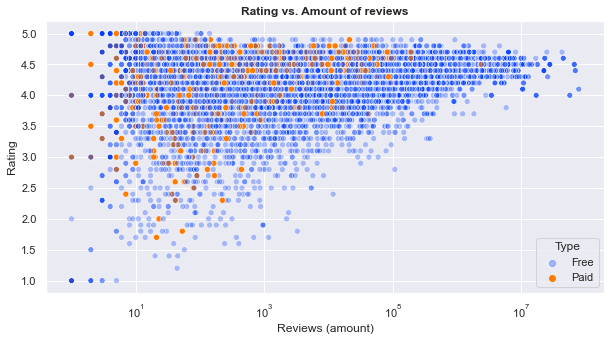

In [26]:
fig = plt.figure(figsize=(10,5))
sns.scatterplot(data=df_apps, x='Reviews', y='Rating', hue='Type', palette={'Free':to_rgba(sns.color_palette()[0],0.3),'Paid':to_rgba(sns.color_palette()[1],1)}).set_title('Rating vs. Amount of reviews', fontweight='bold')
plt.xlabel('Reviews (amount)')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

<font color='cornflowerblue' size=4><b>6. Linear Regression</b></font>

In [27]:
df_joint=df_reviews.join(df_apps.set_index('App'),on='App').reset_index(drop=True)
df_joint.dropna(inplace=True)
df_joint_y = df_joint['Rating']
df_joint_X = df_joint.loc[:,['Sentiment_ordinal','Reviews','Installs_number','Size_number','Price_number']]
scaler = StandardScaler()
df_joint_X = scaler.fit_transform(df_joint_X)
df_joint_train_X, df_joint_test_X, df_joint_train_y, df_joint_test_y = train_test_split(df_joint_X, df_joint_y, train_size=0.8, random_state=42)

In [28]:
lin_model = LinearRegression()
lin_model = lin_model.fit(df_joint_train_X,df_joint_train_y)
pred_y = lin_model.predict(df_joint_test_X)
print('test RMSE: %.2f'%np.sqrt(mean_squared_error(y_true=df_joint_test_y, y_pred=pred_y)))
print('R2 score: %.2f'%r2_score(y_true=df_joint_test_y,y_pred=pred_y))

test RMSE: 0.28
R2 score: 0.03


<font color='cornflowerblue' size=4><b>7. Random Forest</b></font>

In [29]:
rf_model = RandomForestRegressor(n_estimators=100, min_samples_leaf=0.2, random_state=42)
rf_model = rf_model.fit(df_joint_train_X, df_joint_train_y)
pred_y = rf_model.predict(df_joint_test_X)
print('test RMSE: %.2f'%np.sqrt(mean_squared_error(y_true=df_joint_test_y, y_pred=pred_y)))
print('R2 score: %.2f'%r2_score(y_true=df_joint_test_y,y_pred=pred_y))

test RMSE: 0.26
R2 score: 0.14


<font color='cornflowerblue' size=4><b>8. XGBoost</b></font>

In [31]:
xgboost_model = GradientBoostingRegressor(random_state=42)
xgboost_model = xgboost_model.fit(df_joint_train_X, df_joint_train_y)
pred_y = xgboost_model.predict(df_joint_test_X)
print('test RMSE: %.2f'%np.sqrt(mean_squared_error(y_true=df_joint_test_y, y_pred=pred_y)))
print('R2 score: %.2f'%r2_score(y_true=df_joint_test_y,y_pred=pred_y))

test RMSE: 0.19
R2 score: 0.57


<font color='cornflowerblue' size=4><b>9. XGBoost hyper-parameter optimization</b></font>

<font color='cornflowerblue' size=3>9.1. Number of estimators (n_estimators) optimization</font><br>
The optimized parameter that was chosen is <b>600 estimators</b>. It is a compromise between low test RMSE (and high R2 score), and computational cost.

In [32]:
test_RMSE_list = []
r2_list = []
for n_est in range(100,1001,100):
    xgboost_model = GradientBoostingRegressor(n_estimators=n_est, subsample=0.5, random_state=42)
    xgboost_model = xgboost_model.fit(df_joint_train_X, df_joint_train_y)
    pred_y = xgboost_model.predict(df_joint_test_X)
    test_RMSE_list.append(np.sqrt(mean_squared_error(y_true=df_joint_test_y, y_pred=pred_y)))
    r2_list.append(r2_score(y_true=df_joint_test_y,y_pred=pred_y))

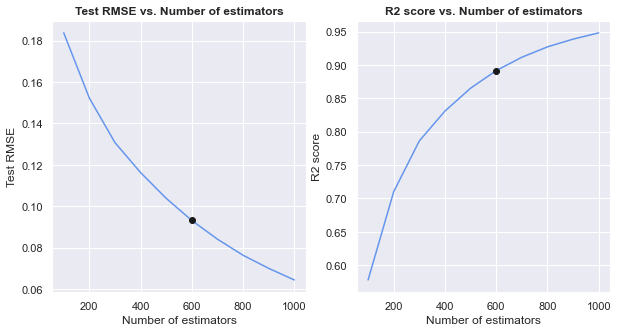

In [33]:
test_RMSE_series = pd.Series(test_RMSE_list, index=range(100,1001,100), name='test_RMSE')
r2_score_series = pd.Series(r2_list, index=range(100,1001,100), name='r2_score')
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.lineplot(data=test_RMSE_series, ax=ax[0], color='cornflowerblue')
sns.lineplot(data=r2_score_series, ax=ax[1], color='cornflowerblue')
ax[0].plot(600,test_RMSE_series[600],'ko')
ax[1].plot(600,r2_score_series[600],'ko')
ax[0].set_title('Test RMSE vs. Number of estimators', fontweight='bold')
ax[1].set_title('R2 score vs. Number of estimators', fontweight='bold')
ax[0].set_xlabel('Number of estimators')
ax[1].set_xlabel('Number of estimators')
ax[0].set_ylabel('Test RMSE')
ax[1].set_ylabel('R2 score')
plt.show()

<font color='cornflowerblue' size=3>9.2. Maximum tree depth (max_depth) optimization</font><br>
The optimized parameter that was chosen is <b>maximum tree depth of 6 nodes</b>. Beyond this number there is a plateau.

In [34]:
test_RMSE_list = []
r2_list = []
for n_depth in range(1,9):
    xgboost_model = GradientBoostingRegressor(n_estimators=600, subsample=0.5, max_depth=n_depth, random_state=42)
    xgboost_model = xgboost_model.fit(df_joint_train_X, df_joint_train_y)
    pred_y = xgboost_model.predict(df_joint_test_X)
    test_RMSE_list.append(np.sqrt(mean_squared_error(y_true=df_joint_test_y, y_pred=pred_y)))
    r2_list.append(r2_score(y_true=df_joint_test_y,y_pred=pred_y))

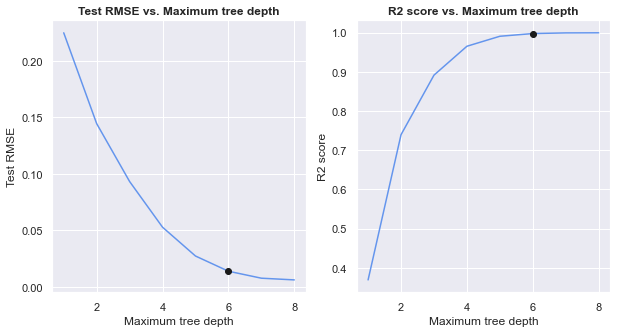

In [35]:
test_RMSE_series = pd.Series(test_RMSE_list, index=range(1,9), name='test_RMSE')
r2_score_series = pd.Series(r2_list, index=range(1,9), name='r2_score')
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
sns.lineplot(data=test_RMSE_series, ax=ax[0], color='cornflowerblue')
sns.lineplot(data=r2_score_series, ax=ax[1], color='cornflowerblue')
ax[0].plot(6,test_RMSE_series[6],'ko')
ax[1].plot(6,r2_score_series[6],'ko')
ax[0].set_title('Test RMSE vs. Maximum tree depth', fontweight='bold')
ax[1].set_title('R2 score vs. Maximum tree depth', fontweight='bold')
ax[0].set_xlabel('Maximum tree depth')
ax[1].set_xlabel('Maximum tree depth')
ax[0].set_ylabel('Test RMSE')
ax[1].set_ylabel('R2 score')
plt.show()

<font color='cornflowerblue' size=3>9.3. XGBoost model after optimization</font>

In [36]:
xgboost_model = GradientBoostingRegressor(n_estimators=600, max_depth=6, random_state=42)
xgboost_model = xgboost_model.fit(df_joint_train_X, df_joint_train_y)
pred_y = xgboost_model.predict(df_joint_test_X)
print('test RMSE: %.2f'%np.sqrt(mean_squared_error(y_true=df_joint_test_y, y_pred=pred_y)))
print('R2 score: %.2f'%r2_score(y_true=df_joint_test_y,y_pred=pred_y))

test RMSE: 0.02
R2 score: 1.00


<font color='cornflowerblue' size=3>9.4. Feature importance</font>

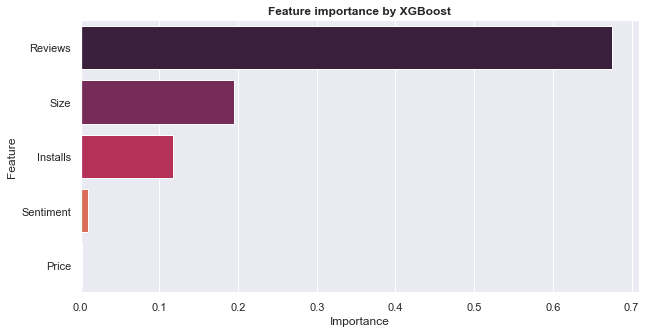

In [38]:
plt.figure(figsize=(10,5))
feature_importance = pd.Series(dict(zip(['Sentiment','Reviews','Installs','Size','Price'], xgboost_model.feature_importances_)))
feature_importance.sort_values(inplace=True, ascending=False)
sns.barplot(x=feature_importance.values, y=feature_importance.keys(), palette='rocket')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature importance by XGBoost', fontweight='bold')
plt.show()